In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('_all_annotations.csv').drop_duplicates()
categories = ['is_abuse','ableism', 'direction', 'homoph', 'intel', 'racist','sex_harassment', 'sexism', 'target', 'trans']
ab_ex = len(data[data['is_abuse'].isin([-1, -2,-3])])

# Running some numbers
print("TOTAL NUMBER OF ANNOTATIONS", len(data))
print("TOTAL NUMBER OF ABUSIVE EXAMPLES", ab_ex)
print("ABUSE %", ab_ex*100/len(data), '\n')

for category in categories:
    print(category.upper(),'\n', data[category].value_counts())
    print(category.upper(),'% \n', data[category].value_counts(normalize=True))
    print()
    

TOTAL NUMBER OF ANNOTATIONS 22048
TOTAL NUMBER OF ABUSIVE EXAMPLES 4485
ABUSE % 20.34198113207547 

IS_ABUSE 
  1    16139
-2     2133
-1     1698
 0     1424
-3      654
Name: is_abuse, dtype: int64
IS_ABUSE % 
  1    0.731994
-2    0.096743
-1    0.077014
 0    0.064586
-3    0.029663
Name: is_abuse, dtype: float64

ABLEISM 
 not_able    4435
able          50
Name: ableism, dtype: int64
ABLEISM % 
 not_able    0.988852
able        0.011148
Name: ableism, dtype: float64

DIRECTION 
 explicit    3714
implicit     771
Name: direction, dtype: int64
DIRECTION % 
 explicit    0.828094
implicit    0.171906
Name: direction, dtype: float64

HOMOPH 
 not_homoph    4330
homophobic     155
Name: homoph, dtype: int64
HOMOPH % 
 not_homoph    0.96544
homophobic    0.03456
Name: homoph, dtype: float64

INTEL 
 not_intellectual    3905
intellectual         580
Name: intel, dtype: int64
INTEL % 
 not_intellectual    0.87068
intellectual        0.12932
Name: intel, dtype: float64

RACIST 
 not_racist 

In [52]:
import data_analysis as da
import nltk
from nltk.corpus import stopwords
#nltk.download('punkt')

data.dropna(subset=['Input.user'],inplace=True)
tokenized = data['Input.user'].apply(da.custom_tokenize)
lower_tokens = tokenized.apply(lambda x: [t.lower() for t in x])
alpha_only = lower_tokens.apply(lambda x: [t for t in x if t.isalpha()])
no_stops = alpha_only.apply(lambda x: [t for t in x if t not in stopwords.words('english')])


NameError: name 'path' is not defined

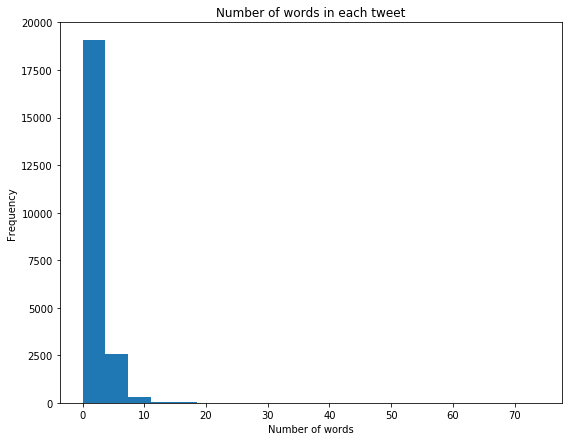

In [54]:
# Average length of utterance:
_ = no_stops.str.len().hist(grid=False, figsize=(9,7), bins=20)
_ = plt.xlabel('Number of words')
_ = plt.ylabel('Frequency')
_ = plt.title('Number of words in each tweet')
plt.show()

/Users/amandacurry/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


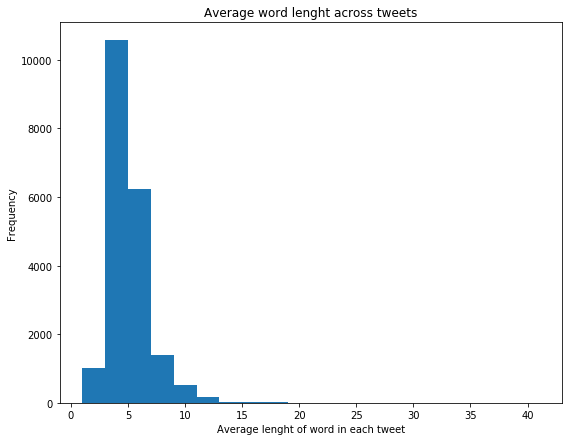

In [56]:
import numpy as np
_ = no_stops.apply(lambda x: [len(word) for word in x]).apply(lambda y: np.mean(y)).hist(grid=False, bins=20, figsize=(9,7))
_ = plt.xlabel('Average lenght of word in each tweet')
_ = plt.ylabel('Frequency')
_ = plt.title('Average word lenght across tweets')
plt.show()

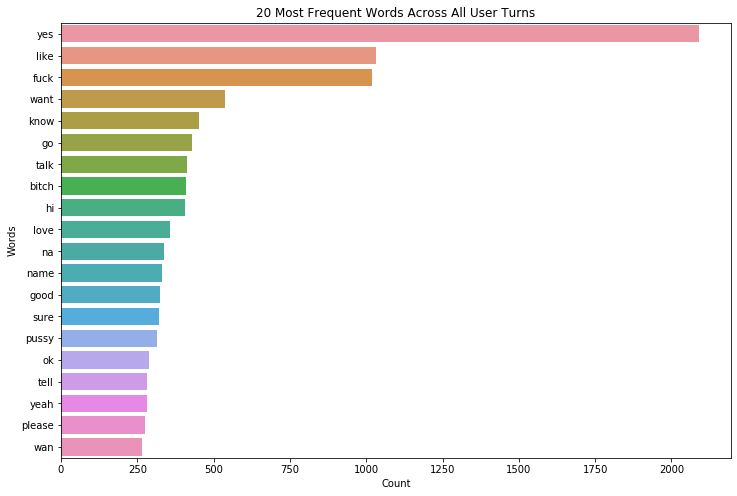

In [63]:
from gensim.corpora.dictionary import Dictionary
import collections, itertools
import seaborn as sns

# Create a Dictionary from the tweets
dictionary = Dictionary(no_stops)
corpus = no_stops.apply(lambda x: dictionary.doc2bow(x))
total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id]+=word_count
    
sorted_bow = sorted(total_word_count.items(), key=lambda kv :kv[1], reverse=True)
words = []
word_counts = []
for word_id, word_count in sorted_bow[:20]:
    words.append(dictionary.get(word_id)) 
    word_counts.append(word_count)
    
fig = plt.figure(figsize=(12,8))
fig = sns.barplot(x=word_counts, y=words)
fig = plt.xlabel("Count")
fig = plt.ylabel('Words')
fig = plt.title('20 Most Frequent Words Across All User Turns')
plt.show()


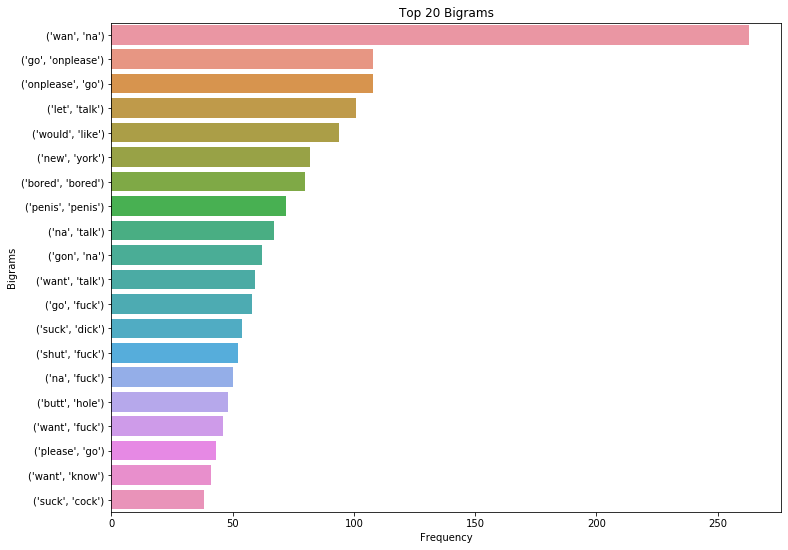

In [66]:
from nltk.util import ngrams
from collections import Counter 
bigrams = no_stops.apply(lambda x: ngrams(x,2))
bi_grams = bigrams.apply(lambda x: list(x))
top_20_bigrams = Counter(itertools.chain.from_iterable(bi_grams)).most_common(20)

top_bigram = pd.DataFrame(top_20_bigrams, columns=['bigram', 'frequency'])
top_bigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_bigram.frequency, y=top_bigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Bigrams')
_ = plt.title('Top 20 Bigrams')
plt.show()

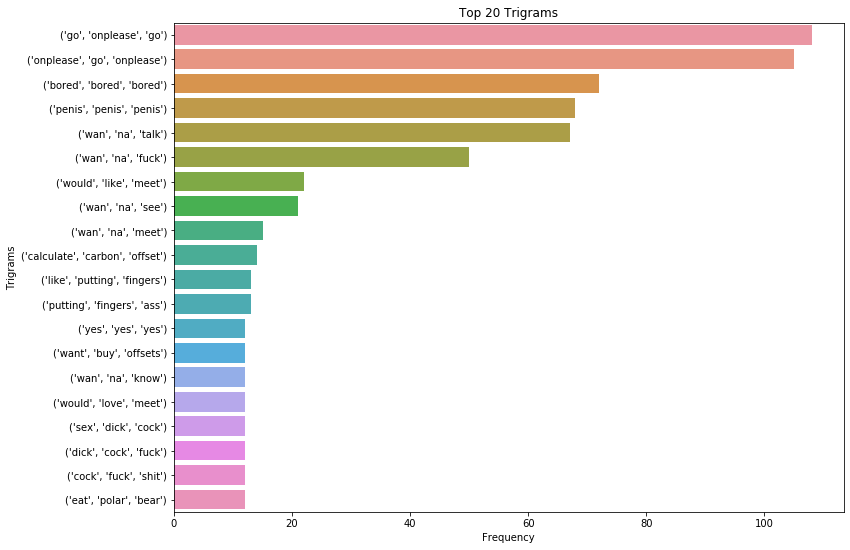

In [67]:
trigrams = no_stops.apply(lambda x: ngrams(x,3))
tri_grams = trigrams.apply(lambda x: list(x))
top_20_trigrams = Counter(itertools.chain.from_iterable(tri_grams)).most_common(20)
top_trigram = pd.DataFrame(top_20_trigrams, columns=['bigram', 'frequency'])
top_trigram.set_index('bigram', inplace=True)
_ = plt.figure(figsize=(12,9))
_ = sns.barplot(x=top_trigram.frequency, y=top_trigram.index, orient='h')
_ = plt.xlabel('Frequency')
_ = plt.ylabel('Trigrams')
_ = plt.title('Top 20 Trigrams')
plt.show()

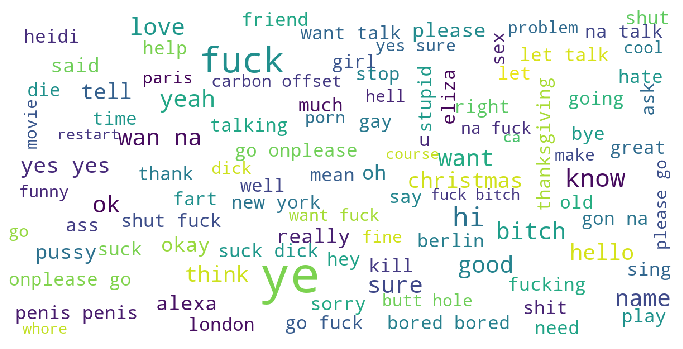

In [83]:
from wordcloud import WordCloud, STOPWORDS
import itertools

stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
    #print(str(data))
    wordcloud=wordcloud.generate(str(data).replace('\'', ''))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

text = list(itertools.chain.from_iterable(no_stops.tolist()))
show_wordcloud(text)